# Solving house price prediction Problem from Kaggle.

Problem Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

---
##Basic Initializing
---

Basic **imports** and **mouting**

In [124]:
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Loading the data**

In [125]:
#pd.options.display.max_rows = 4000

location_dataset = "gdrive/My Drive/Datasets/house-prices-advanced-regression-techniques"
location_trainData = location_dataset + "/train.csv"
trainData = pd.read_csv(location_trainData)

location_trainData = location_dataset + "//train.csv"
location_testData = location_dataset + "//test.csv"

trainData = pd.read_csv(location_trainData)
testData = pd.read_csv(location_testData)

#print(type(trainData))

trainLabel = trainData["SalePrice"]

Ids = testData['Id']
Ids = pd.DataFrame(Ids)


tmpShad = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']
column_for_heatmap = trainData.columns
i = 0

for field in tmpShad:
  idx = trainData.columns.get_loc(field)
  column_for_heatmap = column_for_heatmap.delete(idx - i)
  i += 1

print(column_for_heatmap)

#column_for_heatmap.append(trainData.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

---
##Pre-processing Starts here
---

Getting some insight about the data

In [126]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Visualizing the fluctuation of the Sale Prices in Training Data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


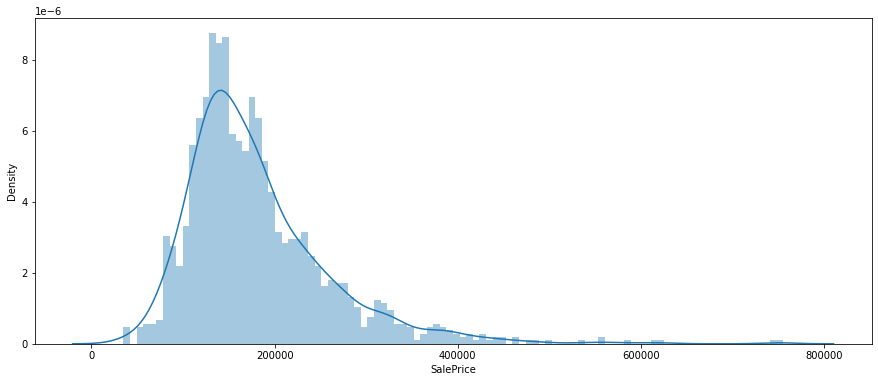

In [127]:
plt.figure(figsize=(15, 6))
sns.distplot(trainData['SalePrice'],bins=100)

Following are my findings in Training Data -
1.   Dependent variable SalePrice has a normal distribution
2.   SalePrice has a mean of around 1,800,000
3.   Very less outliers




Trying to find if there remains any correlation among the variables with a Heatmap

**FOR TRAINING DATA**
Dropping Id column, replacing Null values with mean and mode to associated positions

In [128]:
trainData.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], inplace=True, axis=1)

trainData["LotFrontage"] = trainData["LotFrontage"].fillna(trainData["LotFrontage"].mean())
trainData["MasVnrArea"] = trainData["MasVnrArea"].fillna(trainData["MasVnrArea"].mean())

trainData["BsmtQual"] = trainData["BsmtQual"].fillna(trainData["BsmtQual"].mode()[0])
trainData["BsmtCond"] = trainData["BsmtCond"].fillna(trainData["BsmtCond"].mode()[0])
trainData["BsmtExposure"] = trainData["BsmtExposure"].fillna(trainData["BsmtExposure"].mode()[0])
trainData["BsmtFinType1"] = trainData["BsmtFinType1"].fillna(trainData["BsmtFinType1"].mode()[0])
trainData["BsmtFinType2"] = trainData["BsmtFinType2"].fillna(trainData["BsmtFinType2"].mode()[0])
trainData["GarageType"] = trainData["GarageType"].fillna(trainData["GarageType"].mode()[0])
trainData["GarageYrBlt"] = trainData["GarageYrBlt"].fillna(trainData["GarageYrBlt"].mode()[0])
trainData["GarageFinish"] = trainData["GarageFinish"].fillna(trainData["GarageFinish"].mode()[0])
trainData["GarageQual"] = trainData["GarageQual"].fillna(trainData["GarageQual"].mode()[0])
trainData["GarageCond"] = trainData["GarageCond"].fillna(trainData["GarageCond"].mode()[0])
trainData["MasVnrType"] = trainData["MasVnrType"].fillna(trainData["MasVnrType"].mode()[0])
trainData["Electrical"] = trainData["Electrical"].fillna(trainData["Electrical"].mode()[0])

**FOR TESTING DATA** Dropping Id column, replacing Null values with mean and mode to associated positions

In [129]:
testData.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)

testData["LotFrontage"] = testData["LotFrontage"].fillna(testData["LotFrontage"].mean())
testData["MasVnrArea"] = testData["MasVnrArea"].fillna(testData["MasVnrArea"].mean())
testData["BsmtFinSF1"] = testData["BsmtFinSF1"].fillna(testData["BsmtFinSF1"].mean())
testData["BsmtFinSF2"] = testData["BsmtFinSF2"].fillna(testData["BsmtFinSF2"].mean())
testData["BsmtUnfSF"] = testData["BsmtUnfSF"].fillna(testData["BsmtUnfSF"].mean())
testData["TotalBsmtSF"] = testData["TotalBsmtSF"].fillna(testData["TotalBsmtSF"].mean())
testData["GarageArea"] = testData["GarageArea"].fillna(testData["GarageArea"].mean())

testData["BsmtQual"] = testData["BsmtQual"].fillna(testData["BsmtQual"].mode()[0])
testData["BsmtCond"] = testData["BsmtCond"].fillna(testData["BsmtCond"].mode()[0])
testData["BsmtExposure"] = testData["BsmtExposure"].fillna(testData["BsmtExposure"].mode()[0])
testData["BsmtFinType1"] = testData["BsmtFinType1"].fillna(testData["BsmtFinType1"].mode()[0])
testData["BsmtFinType2"] = testData["BsmtFinType2"].fillna(testData["BsmtFinType2"].mode()[0])
testData["GarageType"] = testData["GarageType"].fillna(testData["GarageType"].mode()[0])
testData["GarageYrBlt"] = testData["GarageYrBlt"].fillna(testData["GarageYrBlt"].mode()[0])
testData["GarageFinish"] = testData["GarageFinish"].fillna(testData["GarageFinish"].mode()[0])
testData["GarageQual"] = testData["GarageQual"].fillna(testData["GarageQual"].mode()[0])
testData["GarageCond"] = testData["GarageCond"].fillna(testData["GarageCond"].mode()[0])
testData["MasVnrType"] = testData["MasVnrType"].fillna(testData["MasVnrType"].mode()[0])
testData["Electrical"] = testData["Electrical"].fillna(testData["Electrical"].mode()[0])
testData["MSZoning"] = testData["MSZoning"].fillna(testData["MSZoning"].mode()[0])
testData["Utilities"] = testData["Utilities"].fillna(testData["Utilities"].mode()[0])
testData["Exterior1st"] = testData["Exterior1st"].fillna(testData["Exterior1st"].mode()[0])
testData["Exterior2nd"] = testData["Exterior2nd"].fillna(testData["Exterior2nd"].mode()[0])
testData["BsmtFullBath"] = testData["BsmtFullBath"].fillna(testData["BsmtFullBath"].mode()[0])
testData["BsmtHalfBath"] = testData["BsmtHalfBath"].fillna(testData["BsmtHalfBath"].mode()[0])
testData["KitchenQual"] = testData["KitchenQual"].fillna(testData["KitchenQual"].mode()[0])
testData["Functional"] = testData["Functional"].fillna(testData["Functional"].mode()[0])
testData["GarageCars"] = testData["GarageCars"].fillna(testData["GarageCars"].mode()[0])
testData["SaleType"] = testData["SaleType"].fillna(testData["SaleType"].mode()[0])

**Label Encoder Function** for encoding the categorical data of the dataset

In [130]:
def encode_data(data):
    columns = list(data.select_dtypes(['object']).columns)
    x = data.iloc[:, :].values
    label_enc = LabelEncoder()
    rows = data.shape[0]

    for field in columns:
        # print(field)
        index_column = data.columns.get_loc(field)
        tmp = np.array(['shad' for _ in range(rows)])
        for i in range(rows):
            tmp[i] = x[:, index_column:index_column + 1][i][0]
        tmp = label_enc.fit_transform(tmp)
        tmp = np.reshape(tmp, (-1, 1))
        x[:, index_column:index_column + 1] = tmp

    return x

**Encoding** Training and Testing Data

In [131]:
trainData = encode_data(trainData)
testData = encode_data(testData)

print(trainData)

#np.savetxt("shad.csv", trainData, delimiter=",")

#print(trainLabel)

[[60 3 65.0 ... 2008 6 4]
 [20 3 80.0 ... 2007 6 4]
 [60 3 68.0 ... 2008 6 4]
 ...
 [70 3 66.0 ... 2010 6 4]
 [20 3 68.0 ... 2010 6 4]
 [20 3 75.0 ... 2008 6 4]]


************************************
MSSubClass is related with: 
BldgType
************************************
MSZoning is related with: 
************************************
LotFrontage is related with: 
************************************
LotArea is related with: 
************************************
Street is related with: 
************************************
LotShape is related with: 
************************************
LandContour is related with: 
************************************
Utilities is related with: 
************************************
LotConfig is related with: 
************************************
LandSlope is related with: 
************************************
Neighborhood is related with: 
************************************
Condition1 is related with: 
************************************
Condition2 is related with: 
************************************
BldgType is related with: 
MSSubClass
************************************
HouseStyle is related with: 
**

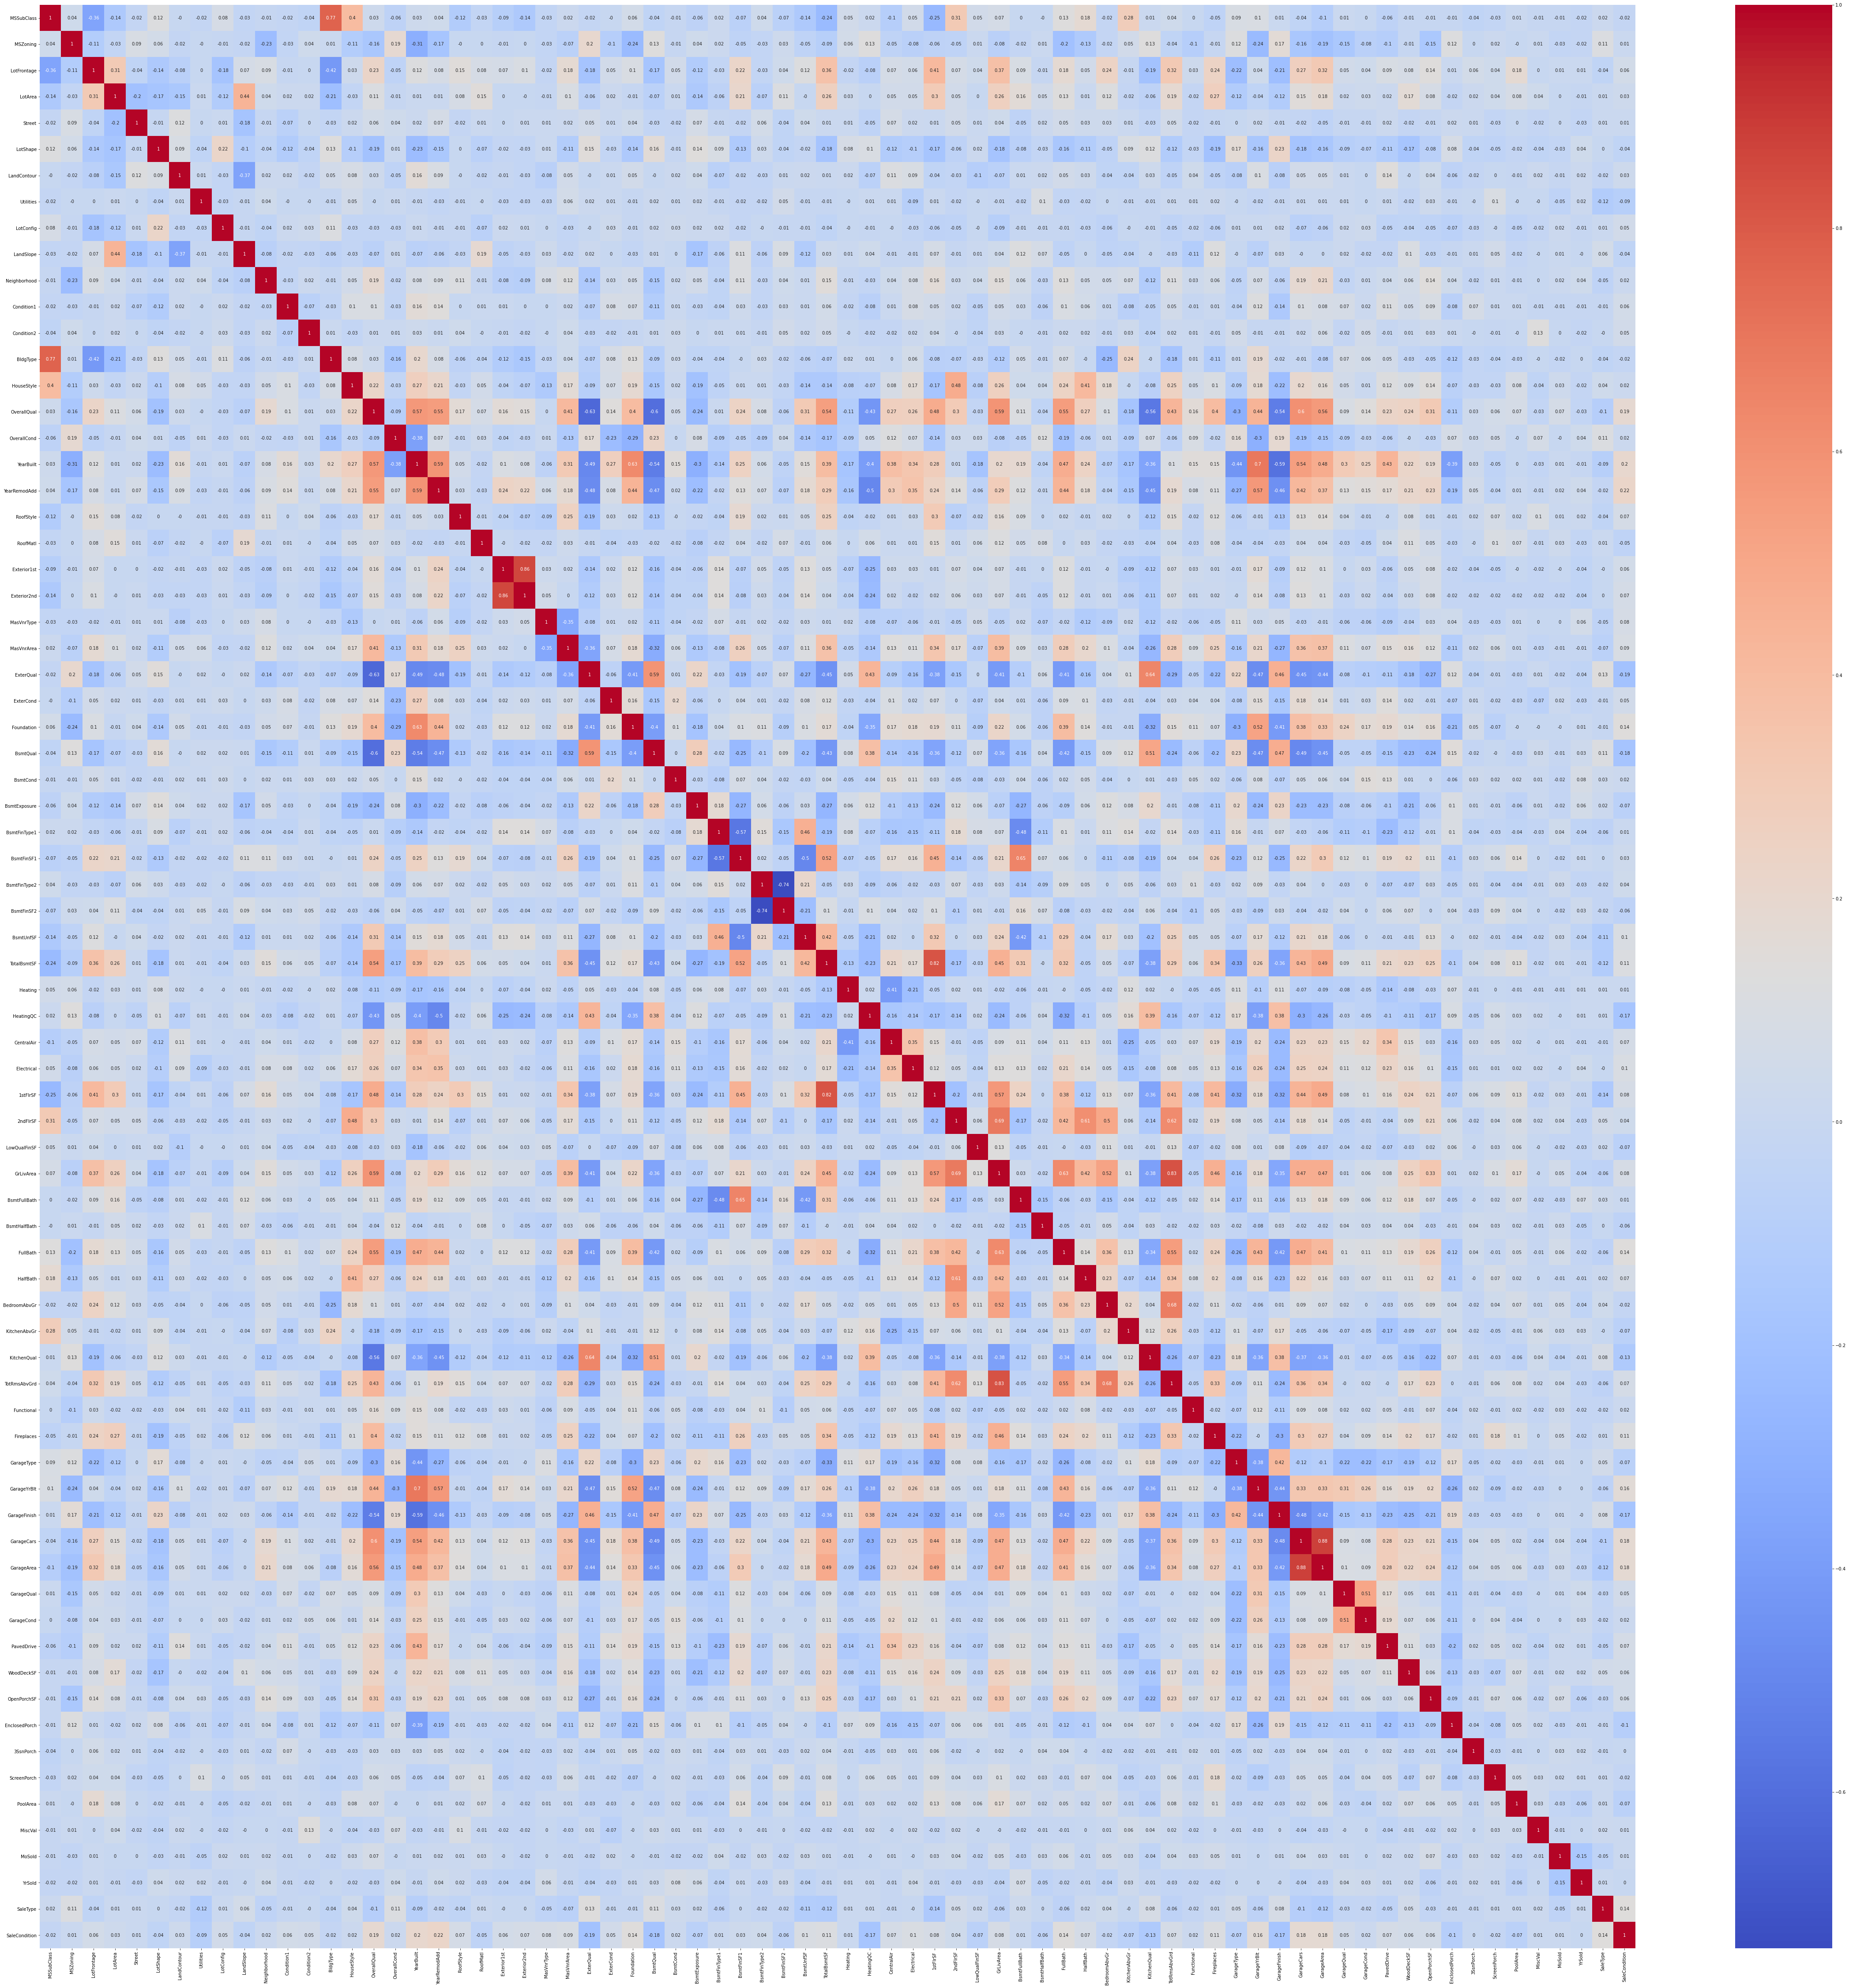

In [168]:
column_for_heatmap = column_for_heatmap
#print(column_for_heatmap)
tmpTrainData = pd.DataFrame(trainData, columns=column_for_heatmap, dtype=float)


#tmpTrainData.info()

plt.figure(figsize=(81, 81))
corr_matrix = tmpTrainData.corr().round(2)

#print(corr_matrix)

for col in column_for_heatmap:
  i = 0
  print("************************************")
  print(str(col) + " is related with: ")
  for i in range(74):
    if( (corr_matrix[str(col)][i] >= 0.5) and (corr_matrix[str(col)][i] != 1.0)):
      print(column_for_heatmap[i])
  '''
  if(corr_matrix[str(col)] >= 0.5):
    print(corr_matrix[str(col)])
'''
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)


---
##Model Training Starts here
---




In [ ]:
#model = DecisionTreeRegressor()
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
model.fit(trainData, trainLabel)
sale_prices_predicted = model.predict(testData)

out = pd.DataFrame(sale_prices_predicted)
ds=pd.concat([Ids, out], axis=1)
ds.columns=['Id', 'SalePrice']
#ds.to_csv('1. DT_sample_submission.csv', index=False)
print(ds.head())
#ds.to_csv('2. RF_sample_submission.csv', index=False)
#files.download('2. RF_sample_submission.csv')

     Id  SalePrice
0  1461  127695.58
1  1462  154083.84
2  1463  181063.44
3  1464  178012.82
4  1465  198615.56
